In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

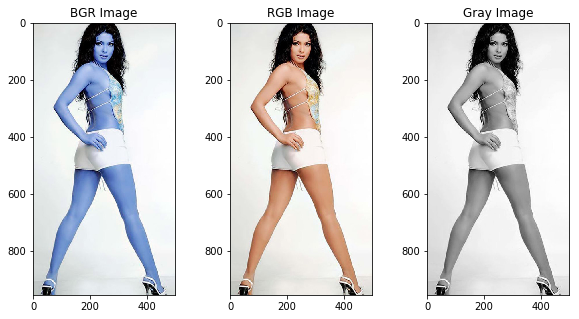

In [14]:
img = cv2.imread('../dog-project/lfw/Priyanka_Chopra/Priyanka_Chopra_0005.jpg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.set_title('BGR Image')
ax1.imshow(img)

ax2.set_title('RGB Image')
ax2.imshow(rgb_img)

ax3.set_title('Gray Image')
ax3.imshow(gray_img, cmap='gray')

plt.show()

In [15]:
# Vertical edge 
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
# Horizontal edge
sobel_y = sobel_x.T

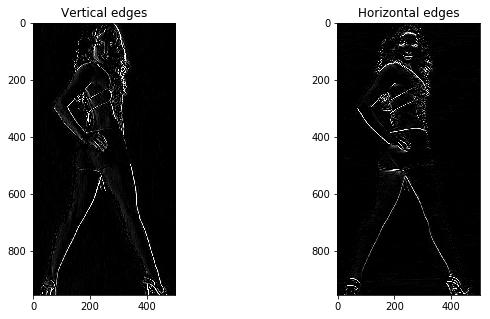

In [16]:
# Peform convolution using filter2D
v_filtered_img = cv2.filter2D(gray_img, -1, sobel_x)
# Peform convolution using filter2D
h_filtered_img = cv2.filter2D(gray_img, -1, sobel_y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Vertical edges')
ax1.imshow(v_filtered_img, cmap='gray')

ax2.set_title('Horizontal edges')
ax2.imshow(h_filtered_img, cmap='gray')

plt.show()

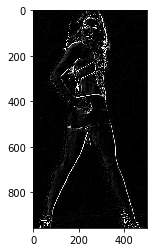

In [17]:
xy_filter = sobel_x + sobel_y
xy_filtered_img = cv2.filter2D(gray_img, -1, xy_filter)
plt.imshow(xy_filtered_img, cmap='gray')
plt.show()

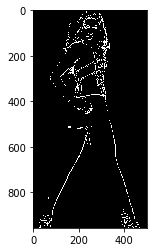

In [18]:
# Create threshold
retval, binary_image = cv2.threshold(xy_filtered_img, 75, 220, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray') 

## Gaussian blur

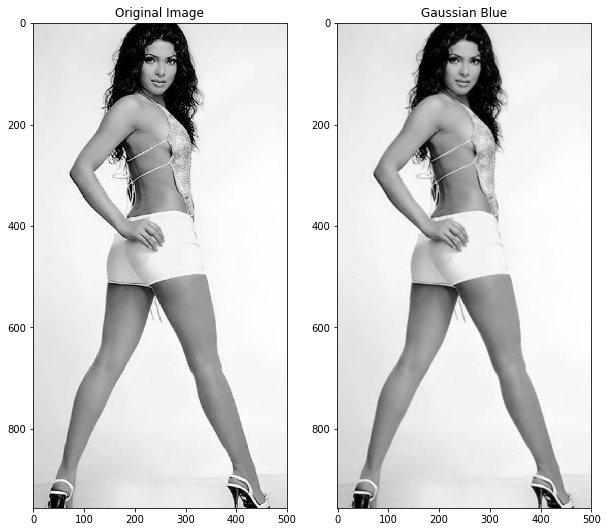

In [32]:
gauss_blur = cv2.GaussianBlur(gray_img, (3, 3), 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.set_title('Original Image')
ax1.imshow(gray_img, cmap='gray')

ax2.set_title('Gaussian Blue')
ax2.imshow(gauss_blur, cmap='gray')

plt.show()

## Canny Edge Detection
- Filters out noise using a Gaussian Blur
- Finds the strength and direction of edges using Sobel filters
- Applies non-maximum suppression to isolate the strongest edges and them them to one-pixel wide lines
- Uses hysteresis to isolate the best edges (1:2 or 1:3)

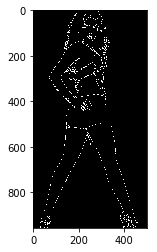

In [39]:
lower_hys = 180
upper_hys = 220

edges = cv2.Canny(gray_img, lower_hys, upper_hys)
plt.imshow(edges, cmap='gray')

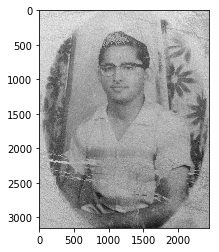

In [64]:
nanie_1 = cv2.imread('../../../../Pictures/nanie_img.jpg')
n_g = cv2.cvtColor(nanie_1, cv2.COLOR_BGR2GRAY)
crop_img = n_g[1050:4200, 150:2600]
plt.imshow(crop_img, cmap='gray')